<a href="https://colab.research.google.com/github/abayashoknair/abayashoknair/blob/main/Leaf_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abaykanoor","key":"76c3167d8733b2c18a9bc5b95486c5a8"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d rashikrahmanpritom/plant-disease-recognition-dataset

 99% 1.24G/1.25G [00:08<00:00, 197MB/s]
100% 1.25G/1.25G [00:08<00:00, 151MB/s]


In [7]:
! unzip plant-disease-recognition-dataset.zip

Archive:  plant-disease-recognition-dataset.zip
  inflating: Test/Test/Healthy/8ddaa5a5caa5caa8.jpg  
  inflating: Test/Test/Healthy/8ddaac1bd6c8cd0a.jpg  
  inflating: Test/Test/Healthy/8ddd5ec1c0de38c4.jpg  
  inflating: Test/Test/Healthy/8def3f60308ab41b.jpg  
  inflating: Test/Test/Healthy/8def4d91382175c3.jpg  
  inflating: Test/Test/Healthy/8df452e2e38c0b6e.jpg  
  inflating: Test/Test/Healthy/8dfae9d78cc32089.jpg  
  inflating: Test/Test/Healthy/8e3dbccdfe08c850.jpg  
  inflating: Test/Test/Healthy/8e68163c62dc57d5.jpg  
  inflating: Test/Test/Healthy/8e6a823cce9ff40c.jpg  
  inflating: Test/Test/Healthy/8e77857194a59a87.jpg  
  inflating: Test/Test/Healthy/8e79802b3fb770c8.jpg  
  inflating: Test/Test/Healthy/8e7986d1ecd36445.jpg  
  inflating: Test/Test/Healthy/8e7e70a6878c1c79.jpg  
  inflating: Test/Test/Healthy/8e82b1a51bd11afe.jpg  
  inflating: Test/Test/Healthy/8e8470687be37378.jpg  
  inflating: Test/Test/Healthy/8e858c8397706b7b.jpg  
  inflating: Test/Test/Healthy/8e8

In [10]:
import keras
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential, save_model, load_model
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
import numpy as np
from keras.callbacks import TensorBoard
import time
import matplotlib.pyplot as plt
import datetime
import cv2
import os
import tensorflow as tf
import tensorflow.keras
import cv2
print('tf version', tf.__version__)
print('keras version', tf.keras.__version__)
print('gpu is ','available' if tf.config.list_physical_devices('GPU') else 'not available')

tf version 2.8.0
keras version 2.8.0
gpu is  available


In [16]:
img_width, img_height = 80,80
NAME = 'Model3_CNN_{}'.format(datetime.datetime.now().strftime("%d.%m.%Y-%H_%M"))
train_data_dir = '/content/Train/Train/'
validation_data_dir = '/content/Test/Test/'
eval_data_dir = '/content/Validation/Validation/'


nb_train_samples = 1322
nb_validation_samples = 150
nb_eval_samples = 60 
epochs = 100
batch_size = 128
num_of_class = 3


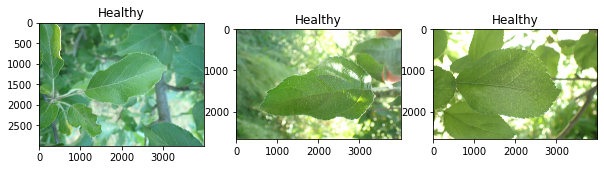

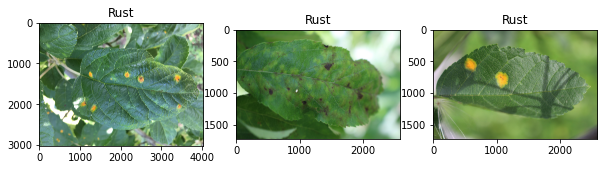

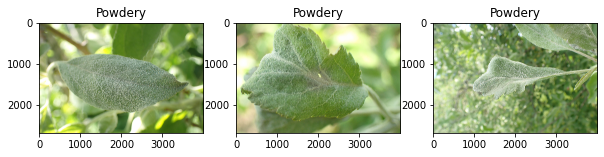

In [18]:
import random

def rescale_and_plot_images(image_files,class_name):
    for idx, img_path in enumerate(image_files):
        plt.subplot(3, 3, idx + 1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap = 'gray')
        plt.title(class_name)

def plot_images(path, class_name):
    image_paths = []
    class_name_path = os.path.join(path, class_name)
    image_paths = [os.path.join(class_name_path, img_png) for img_png in random.sample(os.listdir(class_name_path), 3)]
    
    plt.figure(figsize = (10, 25))
    rescale_and_plot_images(image_paths,class_name)
    

plot_images(train_data_dir, 'Healthy')
plot_images(train_data_dir, 'Rust')
plot_images(train_data_dir, 'Powdery')

In [19]:
input_shape = (img_width, img_height, 3) 

model3 = Sequential()

model3.add(Conv2D(32, (3,3), input_shape=input_shape, activation='relu',data_format='channels_last'))
model3.add(MaxPooling2D((2,2), strides=(1,1), padding='same'),)

model3.add(Conv2D(64, (3,3), activation='relu'),)
model3.add(MaxPooling2D((2,2), strides=(1,1), padding='same'),)

model3.add(Conv2D(128, (3,3), activation='relu'),)
model3.add(MaxPooling2D((2,2), strides=(1,1), padding='same'),)
# model3.add(Dropout(0.15))

model3.add(Flatten())

model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))

model3.add(Dropout(0.5))
model3.add(Dense(num_of_class, activation='softmax'))

In [20]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 78, 78, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 76, 76, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 76, 76, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 128)      0

In [22]:
model3.compile(loss ='categorical_crossentropy',
                     optimizer ='rmsprop', 
                   metrics =['accuracy']) 

In [23]:
H = model3.fit_generator(train_generator,
    steps_per_epoch = nb_train_samples // batch_size, 
    epochs = epochs, validation_data = validation_generator, 
    validation_steps = nb_validation_samples // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/100
10/10 [==============================] - 203s 19s/step - loss: 79.7288 - accuracy: 0.3664 - val_loss: 1.0977 - val_accuracy: 0.3828
Epoch 2/100
10/10 [==============================] - 177s 18s/step - loss: 1.1001 - accuracy: 0.3543 - val_loss: 1.0979 - val_accuracy: 0.3984
Epoch 3/100
10/10 [==============================] - 175s 18s/step - loss: 1.1728 - accuracy: 0.4255 - val_loss: 1.0969 - val_accuracy: 0.3984
Epoch 4/100
10/10 [==============================] - 174s 18s/step - loss: 1.0974 - accuracy: 0.3660 - val_loss: 1.0944 - val_accuracy: 0.4219
Epoch 5/100
10/10 [==============================] - 175s 18s/step - loss: 1.6537 - accuracy: 0.3492 - val_loss: 1.3744 - val_accuracy: 0.2188
Epoch 6/100
10/10 [==============================] - 178s 18s/step - loss: 1.8924 - accuracy: 0.2391 - val_loss: 1.3463 - val_accuracy: 0.3906
Epoch 7/100
10/10 [==============================] - 174s 18s/step - loss: 1.1861 - accuracy: 0.4606 - val_loss: 1.0927 - val_accuracy: 0.468

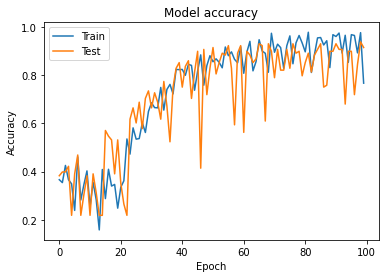

In [24]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
fig, ax = plt.subplots(1,1)
plt.plot(H.history["accuracy"])
plt.plot(H.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


fig.savefig('./'+'model1_train_test_accuracy.jpeg',dpi=93)

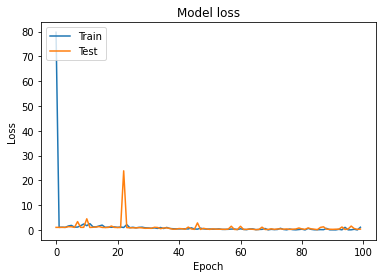

In [25]:
# Plot training & validation loss values
fig, ax = plt.subplots(1,1)
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
fig.savefig('./'+'model1_train_test_los.jpeg',dpi=93)

In [26]:
model3.save('./'+NAME+'.hdf5')

In [27]:
validation_generator.class_indices

{'Healthy': 0, 'Powdery': 1, 'Rust': 2}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  import sys


Classification Report
              precision    recall  f1-score   support

     Healthy       0.89      0.80      0.84        20
     Powdery       0.77      1.00      0.87        20
        Rust       1.00      0.80      0.89        20

    accuracy                           0.87        60
   macro avg       0.89      0.87      0.87        60
weighted avg       0.89      0.87      0.87        60



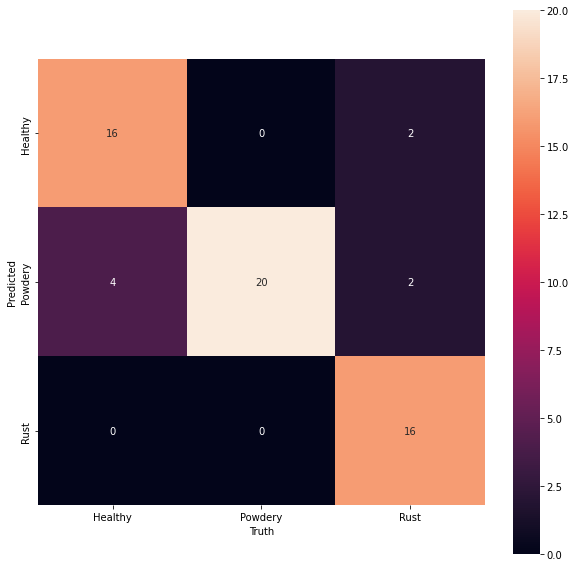

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
target_names=['Healthy','Powdery','Rust']

Y_pred = model3.predict_generator(eval_generator, nb_eval_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)


plt.figure(figsize=(10,10))
cm = confusion_matrix(eval_generator.classes, y_pred)
_=sns.heatmap(cm.T, annot=True, fmt='d', cbar=True, square=True, xticklabels=target_names,
             yticklabels=target_names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.savefig('./'+'confusion_matrix_onEval.jpeg',dpi=93)

print('Classification Report')
report = classification_report(eval_generator.classes, y_pred, target_names=target_names)
print(report)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  import sys


Classification Report
              precision    recall  f1-score   support

     Healthy       0.83      0.90      0.87        50
     Powdery       0.87      0.92      0.89        50
        Rust       1.00      0.86      0.92        50

    accuracy                           0.89       150
   macro avg       0.90      0.89      0.89       150
weighted avg       0.90      0.89      0.89       150



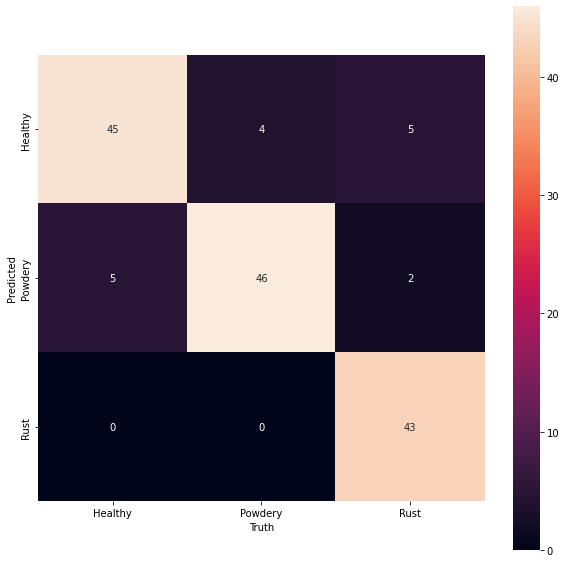

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


Y_pred = model3.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)


plt.figure(figsize=(10,10))
cm = confusion_matrix(validation_generator.classes, y_pred)
_=sns.heatmap(cm.T, annot=True, fmt='d', cbar=True, square=True, xticklabels=target_names,
             yticklabels=target_names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.savefig('./'+'confusion_matrix_onValidation.jpeg',dpi=93)

print('Classification Report')
report = classification_report(validation_generator.classes, y_pred, target_names=target_names)
print(report)